In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import os
os.environ['SCHP_PATH'] = "/content/drive/MyDrive/virtual_tryon_project/Self-Correction-Human-Parsing"
SCHP_PATH = "/content/drive/MyDrive/virtual_tryon_project/Self-Correction-Human-Parsing"

In [30]:
%%bash
wget -q https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh -O miniconda.sh
chmod +x miniconda.sh
./miniconda.sh -b -p /content/miniconda

ERROR: File or directory already exists: '/content/miniconda'
If you want to update an existing installation, use the -u option.


CalledProcessError: Command 'b'wget -q https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh -O miniconda.sh\nchmod +x miniconda.sh\n./miniconda.sh -b -p /content/miniconda\n'' returned non-zero exit status 1.

In [31]:
%%bash
/content/miniconda/bin/conda init bash

no change     /content/miniconda/condabin/conda
no change     /content/miniconda/bin/conda
no change     /content/miniconda/bin/conda-env
no change     /content/miniconda/bin/activate
no change     /content/miniconda/bin/deactivate
no change     /content/miniconda/etc/profile.d/conda.sh
no change     /content/miniconda/etc/fish/conf.d/conda.fish
no change     /content/miniconda/shell/condabin/Conda.psm1
no change     /content/miniconda/shell/condabin/conda-hook.ps1
no change     /content/miniconda/lib/python3.7/site-packages/xontrib/conda.xsh
no change     /content/miniconda/etc/profile.d/conda.csh
no change     /root/.bashrc
No action taken.


In [32]:
%%bash
source /content/miniconda/bin/activate
conda create -n schp python=3.7 -y

Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: /content/miniconda/envs/schp

  added / updated specs:
    - python=3.7


The following NEW packages will be INSTALLED:

  _libgcc_mutex      pkgs/main/linux-64::_libgcc_mutex-0.1-main
  _openmp_mutex      pkgs/main/linux-64::_openmp_mutex-5.1-1_gnu
  ca-certificates    pkgs/main/linux-64::ca-certificates-2025.12.2-h06a4308_0
  certifi            pkgs/main/linux-64::certifi-2022.12.7-py37h06a4308_0
  ld_impl_linux-64   pkgs/main/linux-64::ld_impl_linux-64-2.44-h153f514_2
  libffi             pkgs/main/linux-64::libffi-3.4.4-h6a678d5_1
  libgcc             pkgs/main/linux-64::libgcc-15.2.0-h69a1729_7
  libgcc-ng          pkgs/main/linux-64::libgcc-ng-15.2.0-h166f726_7
  libgomp            pkgs/main/linux-64::libgomp-15.2.0-h4751f2c_7
  libstdcxx          pkgs/main/linux-64::libstdcxx



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 26.1.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [33]:
%%bash
source /content/miniconda/bin/activate schp
python --version

Python 3.7.16


In [34]:
%%bash
source /content/miniconda/bin/activate schp
conda install pytorch=1.7.1 torchvision cudatoolkit=11.0 -c pytorch -y

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
  - defaults/linux-64::libtiff-4.2.0-h85742a9_0, defaults/linux-64::libwebp-base-1.6.0-hb7bb969_0, defaults/linux-64::olefile-0.46-py37_0, defaults/linux-64::pillow-8.2.0-py37he98fc37_0
  - defaults/linux-64::giflib-5.2.2-h5eee18b_0, defaults/linux-64::libtiff-4.1.0-h2733197_1, defaults/linux-64::libwebp-1.2.0-h89dd481_0, defaults/linux-64::pillow-9.3.0-py37hace64e9_1done

## Package Plan ##

  environment location: /content/miniconda/envs/schp

  added / updated specs:
    - cudatoolkit=11.0
    - pytorch=1.7.1
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libtiff-4.2.0              |       h85742a9_0         502 KB
    libwebp-base-1.6.0         |       hb7bb969_0         419 KB
    olefile-0.46               |           py37_0    



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 26.1.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [35]:
%%bash
source /content/miniconda/bin/activate schp
python - << EOF
import torch
print(torch.__version__)
print(torch.cuda.is_available())
EOF

1.7.1
True


In [36]:
%%bash
source /content/miniconda/bin/activate schp
export SCHP_PATH="/content/drive/MyDrive/virtual_tryon_project/Self-Correction-Human-Parsing"
# Verify the directory exists
if [ -d "$SCHP_PATH" ]; then
  echo "Found SCHP at $SCHP_PATH"
  cd "$SCHP_PATH"
  pip install -r requirements.txt
else
  echo "ERROR: SCHP not found at $SCHP_PATH. Please check your Drive path."
  exit 1
fi

Found SCHP at /content/drive/MyDrive/virtual_tryon_project/Self-Correction-Human-Parsing
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 MB 7.6 MB/s eta 0:00:00


In [37]:
%%bash
source /content/miniconda/bin/activate schp
pip install tqdm

  Using cached tqdm-4.67.3-py3-none-any.whl (78 kB)
  Using cached importlib_metadata-6.7.0-py3-none-any.whl (22 kB)
  Using cached zipp-3.15.0-py3-none-any.whl (6.8 kB)


download pre trained model

In [38]:
%%bash
source /content/miniconda/bin/activate schp
cd /content/drive/MyDrive/virtual_tryon_project/Self-Correction-Human-Parsing

pip install -q gdown
mkdir -p checkpoints

gdown --id 1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH -O checkpoints/schp.pth


/content/miniconda/envs/schp/lib/python3.7/site-packages/gdown/cli.py:142: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From (original): https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH
From (redirected): https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH&confirm=t&uuid=e88aae2e-4aac-4548-8a4d-5e1c951bb83f
To: /content/drive/MyDrive/virtual_tryon_project/Self-Correction-Human-Parsing/checkpoints/schp.pth
100%|██████████| 267M/267M [00:05<00:00, 48.9MB/s] 


In [39]:
%%bash
source /content/miniconda/bin/activate schp
cd /content/drive/MyDrive/virtual_tryon_project/Self-Correction-Human-Parsing
ls -lh checkpoints


total 256M
-rw------- 1 root root 256M Feb 24 10:42 schp.pth


Patch cv2 image reading with PIL

In [ ]:
grep -n "cv2.imread" ../Self-Correction-Human-Parsing/datasets/simple_extractor_dataset.py
grep -n "cv2.imread" -n /content/drive/MyDrive/virtual_tryon_project/Self-Correction-Human-Parsing/datasets/simple_extractor_dataset.py


CalledProcessError: Command 'b'grep -n "cv2.imread" -n /content/drive/MyDrive/virtual_tryon_project/Self-Correction-Human-Parsing/datasets/simple_extractor_dataset.py\n'' returned non-zero exit status 1.

In [42]:
from pathlib import Path

file_path = Path(f"{SCHP_PATH}/datasets/simple_extractor_dataset.py")

text = file_path.read_text()

old = "img = cv2.imread(img_path, cv2.IMREAD_COLOR)"
new = (
    "from PIL import Image\n"
    "        import numpy as np\n"
    "        img = np.array(Image.open(img_path).convert(\"RGB\"))"
)

if old not in text:
    raise RuntimeError("cv2.imread line not found — aborting")

text = text.replace(old, new)

file_path.write_text(text)

print("PATCH APPLIED SUCCESSFULLY")


RuntimeError: cv2.imread line not found — aborting

In [47]:
%%bash
source /content/miniconda/bin/activate schp
cd /content/drive/MyDrive/virtual_tryon_project/Self-Correction-Human-Parsing

python simple_extractor.py \
  --input /content/drive/MyDrive/virtual_tryon_project/Self-Correction-Human-Parsing/demo_input \
  --output /content/drive/MyDrive/virtual_tryon_project/Self-Correction-Human-Parsing/demo_output \
  --model-restore checkpoints/schp.pth


Evaluating total class number 20 with ['Background', 'Hat', 'Hair', 'Glove', 'Sunglasses', 'Upper-clothes', 'Dress', 'Coat', 'Socks', 'Pants', 'Jumpsuits', 'Scarf', 'Skirt', 'Face', 'Left-arm', 'Right-arm', 'Left-leg', 'Right-leg', 'Left-shoe', 'Right-shoe']


100%|██████████| 1/1 [00:00<00:00,  1.01it/s]


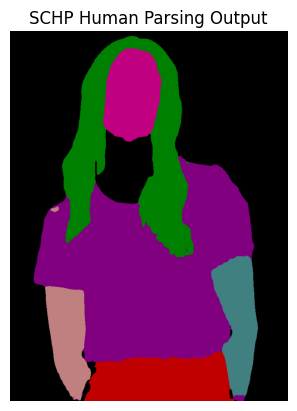

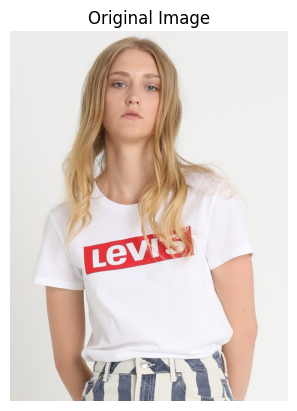

In [48]:
from PIL import Image
import matplotlib.pyplot as plt

parse = Image.open("/content/drive/MyDrive/virtual_tryon_project/Self-Correction-Human-Parsing/demo_output/00005_00.png")
plt.imshow(parse)
plt.title("SCHP Human Parsing Output")
plt.axis("off")

original = Image.open("/content/drive/MyDrive/virtual_tryon_project/Self-Correction-Human-Parsing/demo_input/00005_00.jpg")
plt.figure()
plt.title("Original Image")
plt.axis("off")
plt.imshow(original)

